<a href="https://colab.research.google.com/github/Utyiama/ammd/blob/main/Aula9_RedesNeurais_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais com Keras

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.neighbors import NearestNeighbors
import numpy as np

import tensorflow as tf
from tensorflow import keras

tf.__version__, keras.__version__

('2.5.0', '2.5.0')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
def plotimages(imgs, n_row = 1, n_col = 5, cmap='gray', titles = None):
    _, axs = plt.subplots(n_row, n_col, figsize=(12, 6))
    axs = axs.flatten()
    for i, (img, ax) in enumerate(zip(imgs, axs)):
        if titles is not None:
            ax.set_title(titles[i])
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
    plt.show()

## Dataset

Como base de teste, vamos usar a coleção fashion_mnist, fornecida com o tensorflow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), dtype('uint8'))

In [5]:
X_valid = X_train_full[:5000]
X_train = X_train_full[5000:] 

X_train = (X_train - X_train.mean()) / X_train.std()
X_valid = (X_valid - X_valid.mean()) / X_valid.std()

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Este é um problema de classificação, em que temos imagens das seguintes peças de vestuário:

In [6]:
class_names = ["camisetas/tops", "calças", "Pulôver", "vestido", "Casaco", 
               "Sandália", "Camisa", "Tênis", "Bolsa", "Meia bota"]

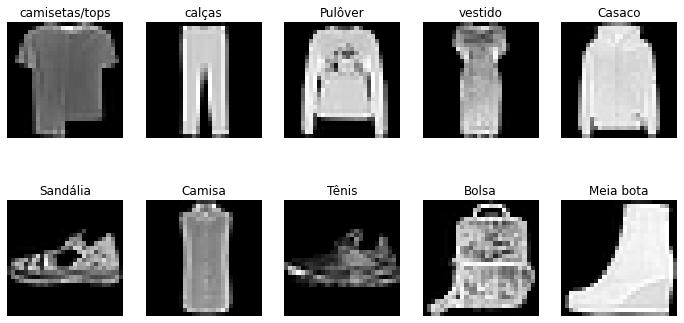

In [7]:
sample = [X_train_full[y_train_full==c][np.random.randint(0,100)] for c in range(len(class_names))]
plotimages(sample, n_row=2, titles = class_names)

## Uma rede Neural com Keras

#### Estilos, treino, teste e avaliação

O Keras possui três estilos de descrição de uma rede neural: (1) sequêncial, (2) funcional e (3) orientado a objetos (sub-classing). Vamos ver exemplos destas formas:

In [8]:
# um modelo sequencial
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [53]:
model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
images (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
input (Flatten)              (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 300)               235500    
_________________________________________________________________
h2 (Dense)                   (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
# um modelo funcional
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="relu", name="h1")(X)
X = keras.layers.Dense(150, activation="relu", name="h2")(X)
X = keras.layers.Dense(100, activation="relu", name="h3")(X)
X = keras.layers.Dense(50, activation="relu", name="h4")(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

In [10]:
# um modelo com sub-classing
class SeqModel(keras.models.Model):
    def __init__(self, **kwargs):
        # call the parent constructor
        super(SeqModel, self).__init__(**kwargs)
        # initialize the layers
        self.input_layer = keras.layers.Flatten(name="input_layer")
        self.h1 = keras.layers.Dense(300, activation="relu", name="h1")
        self.h2 = keras.layers.Dense(150, activation="relu", name="h2")
        self.h3 = keras.layers.Dense(100, activation="relu", name="h3")
        self.h4 = keras.layers.Dense(50, activation="relu", name="h4")
        self.out_layer = keras.layers.Dense(10, activation="softmax", name="out_layer")
  
    def call(self, inputs):
        x = self.input_layer(inputs)
        x = self.h1(x)
        x = self.h2(x)
        x = self.h3(x)
        x = self.h4(x)
        x = self.out_layer(x)
        return x

model = SeqModel()

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, 
                    epochs=10, batch_size = 100,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
550/550 [==============================] - 5s 2ms/step - loss: 0.7462 - accuracy: 0.7432 - val_loss: 0.5021 - val_accuracy: 0.8244
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.8297 - val_loss: 0.4370 - val_accuracy: 0.8432
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8478 - val_loss: 0.4028 - val_accuracy: 0.8550
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3891 - accuracy: 0.8596 - val_loss: 0.3864 - val_accuracy: 0.8622
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3685 - accuracy: 0.8683 - val_loss: 0.3629 - val_accuracy: 0.8692
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8729 - val_loss: 0.3675 - val_accuracy: 0.8674
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8777 - val_loss: 0.3504 - val_accuracy: 0.8740
Epoch 

A seguir, temos um resumo do modelo, que nos ajuda a entender sua complexidade: mais de 300 mil parâmetros!

In [13]:
model.summary()

Model: "seq_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        multiple                  0         
_________________________________________________________________
h1 (Dense)                   multiple                  235500    
_________________________________________________________________
h2 (Dense)                   multiple                  45150     
_________________________________________________________________
h3 (Dense)                   multiple                  15100     
_________________________________________________________________
h4 (Dense)                   multiple                  5050      
_________________________________________________________________
out_layer (Dense)            multiple                  510       
Total params: 301,310
Trainable params: 301,310
Non-trainable params: 0
___________________________________________________

Note que o log do treino guarda informação sobre todas as métricas avaliadas ao longo das épocas, como um dicionário Python:

In [14]:
history.history

{'accuracy': [0.7432000041007996,
  0.8296909332275391,
  0.8478363752365112,
  0.8595636487007141,
  0.8683454394340515,
  0.8729454278945923,
  0.8776909112930298,
  0.8804908990859985,
  0.8844909071922302,
  0.8885818123817444],
 'loss': [0.7461526989936829,
  0.4732035994529724,
  0.4206465780735016,
  0.3891010284423828,
  0.36850854754447937,
  0.3524143397808075,
  0.3389386832714081,
  0.3270808160305023,
  0.3152215778827667,
  0.3063214421272278],
 'val_accuracy': [0.824400007724762,
  0.8432000279426575,
  0.8550000190734863,
  0.8622000217437744,
  0.8691999912261963,
  0.8673999905586243,
  0.8740000128746033,
  0.8777999877929688,
  0.881600022315979,
  0.8769999742507935],
 'val_loss': [0.5021196007728577,
  0.4370323121547699,
  0.4028414785861969,
  0.3864104151725769,
  0.36287277936935425,
  0.3674824833869934,
  0.3504263758659363,
  0.3402393162250519,
  0.3340759575366974,
  0.33613577485084534]}

Isso nos permite facilmente avaliar estes números, com ajuda do Pandas:

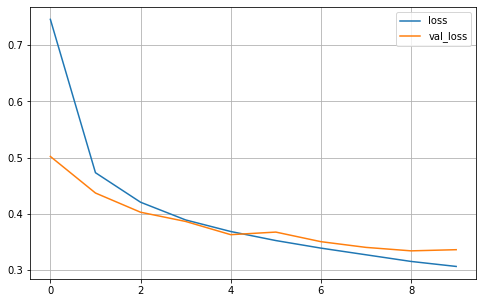

In [15]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Para avaliar o modelo, podemos usar evalute:

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 27.8513 - accuracy: 0.7238


[27.851341247558594, 0.723800003528595]

É bastante simples acessar elementos do modelo, como suas camadas e propriedades de suas camadas, incluindo pesos e biases:

In [17]:
model.layers

In [18]:
model.layers[1].name

'h1'

In [19]:
model.get_layer('h1').name

'h1'

In [20]:
weights, biases = model.get_layer('h2').get_weights()

In [21]:
weights.shape

(300, 150)

In [22]:
weights[:3,:10], biases[:3]

(array([[-0.0816888 ,  0.06523162,  0.07723522, -0.07319505, -0.01069728,
         -0.08015335, -0.08457568,  0.04263711,  0.05940039,  0.00554471],
        [ 0.00804545,  0.08403929,  0.00395513,  0.12151827, -0.08039297,
          0.04949604, -0.11521644, -0.0508768 , -0.00718467, -0.00694969],
        [ 0.10289454,  0.0950188 , -0.08172062,  0.00036124,  0.11044484,
          0.05198731, -0.00226699,  0.11997046,  0.04826827, -0.01631871]],
       dtype=float32),
 array([-0.0028423 ,  0.00025565, -0.00462348], dtype=float32))

Note que em nossa definição do modelo tivemos que definir uma função de perda e um otimizador, usando o método _compile_. Como se trata de uma classificação, resolvemos usar como função de perda a entropia cruzada. Apenas para lembrarmos, dada a entrada da última camada $X_L$ e seus pesos, $W_L$, nosso estimativa é $\hat{Y} = \sigma(X_L W_L)$, onde $\sigma$ é a função de ativação. Queremos combinar nossos 10 regressores com a softmax para termos probabilidades normalizadas. Assim, para cada regressor $j$ temos: 

$$S_j = \frac{\exp(\hat{Y}_j)}{\sum_k \exp(\hat{Y}_k)}$$.

Finalmente, comparamos a estimativa derivada da softmax com o valor real (as _labels_ $L$ codificadas com one-hot) usando a entropia cruzada (neste caso discreto, chamada de entropia categórica):

$$D(S, L) = -\sum_j L_j \log S_j$$

Abaixo, podemos ver como esta função produz maior erro conforme as distribuições divergem:

In [23]:
L  = np.array([1.00, 0.00, 0.00, 0.00])
S0 = np.array([0.90, 0.01, 0.04, 0.05])
S1 = np.array([0.40, 0.20, 0.20, 0.20])
S2 = np.array([0.01, 0.90, 0.04, 0.05])
xent = lambda S, L: -sum(L * np.log(S))
print(xent(S0, L), xent(S1, L), xent(S2, L))

0.10536051565782628 0.916290731874155 4.605170185988091


Para fazermos isso no Keras, usamos _compile_. Também usamos como otimizador o Gradiente Descendente Estocástico e como métrica de avaliação, a acurácia. O modelo foi então treinado usando fit. Neste caso, foi treinado por dez épocas com tamanho de lote 100, medindo seu desempenho contra o conjunto de validação que foi separado antes.

Para termos estimativas do modelo, podemos usar predict:

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Funções de ativação


In [26]:
# relu -> elu
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="elu", name="h1")(X)
X = keras.layers.Dense(150, activation="elu", name="h2")(X)
X = keras.layers.Dense(100, activation="elu", name="h3")(X)
X = keras.layers.Dense(50, activation="elu", name="h4")(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 0.6160 - accuracy: 0.7846 - val_loss: 0.4602 - val_accuracy: 0.8402
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8424 - val_loss: 0.4090 - val_accuracy: 0.8554
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8554 - val_loss: 0.3904 - val_accuracy: 0.8634
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3770 - accuracy: 0.8644 - val_loss: 0.3750 - val_accuracy: 0.8660
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8699 - val_loss: 0.3560 - val_accuracy: 0.8724
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8748 - val_loss: 0.3529 - val_accuracy: 0.8698
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8785 - val_loss: 0.3448 - val_accuracy: 0.8730
Epoch 

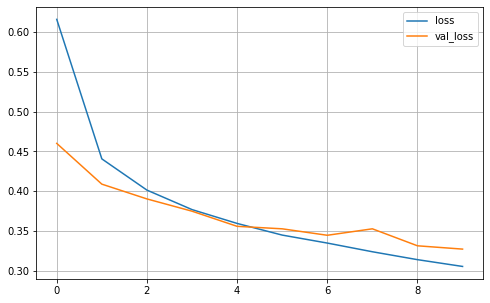

In [27]:
history = model.fit(X_train, y_train, 
                    epochs=10, batch_size = 100,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

#### Otimizadores

In [28]:
# sgd -> adam
model = keras.models.Model(inputs=[model_input], outputs=[yhat])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Epoch 1/10
550/550 [==============================] - 2s 3ms/step - loss: 0.4046 - accuracy: 0.8528 - val_loss: 0.3406 - val_accuracy: 0.8746
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8766 - val_loss: 0.3378 - val_accuracy: 0.8744
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2976 - accuracy: 0.8876 - val_loss: 0.2993 - val_accuracy: 0.8942
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.8966 - val_loss: 0.3097 - val_accuracy: 0.8854
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 0.9027 - val_loss: 0.3034 - val_accuracy: 0.8886
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.9088 - val_loss: 0.3184 - val_accuracy: 0.8834
Epoch 7/10
550/550 [==============================] - 1s 2ms/step - loss: 0.2305 - accuracy: 0.9126 - val_loss: 0.3116 - val_accuracy: 0.8838
Epoch 

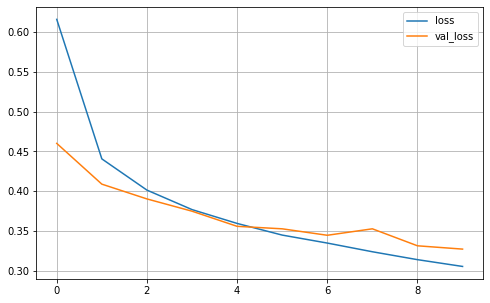

In [29]:
history_adam = model.fit(X_train, y_train, 
                    epochs=10, batch_size = 100,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Comparando o SGD com o Adam observamos que, para este nosso perqueno exemplo, o Adam claramente produz erros menores, embora com muito overfitting.

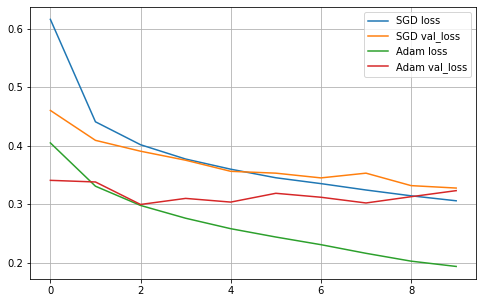

In [30]:
ax = pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
pd.DataFrame(history_adam.history)[['loss', 'val_loss']].plot(figsize=(8, 5), ax = ax)
plt.legend(['SGD loss', 'SGD val_loss', 'Adam loss', 'Adam val_loss'])
plt.grid(True)
plt.show()

#### Parada Antecipada -- uma forma bem melhor de treinar um modelo

In [31]:
# early stopping
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="elu", name="h1")(X)
X = keras.layers.Dense(150, activation="elu", name="h2")(X)
X = keras.layers.Dense(100, activation="elu", name="h3")(X)
X = keras.layers.Dense(50, activation="elu", name="h4")(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [32]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

Epoch 1/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4672 - accuracy: 0.8305 - val_loss: 0.3479 - val_accuracy: 0.8728
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 0.3466 - accuracy: 0.8718 - val_loss: 0.3432 - val_accuracy: 0.8752
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.8849 - val_loss: 0.3242 - val_accuracy: 0.8872
Epoch 4/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2845 - accuracy: 0.8934 - val_loss: 0.3266 - val_accuracy: 0.8834
Epoch 5/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.8985 - val_loss: 0.3192 - val_accuracy: 0.8824
Epoch 6/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2484 - accuracy: 0.9054 - val_loss: 0.3082 - val_accuracy: 0.8896
Epoch 7/100
550/550 [==============================] - 1s 2ms/step - loss: 0.2325 - accuracy: 0.9127 - val_loss: 0.3133 - val_accuracy: 0.8934

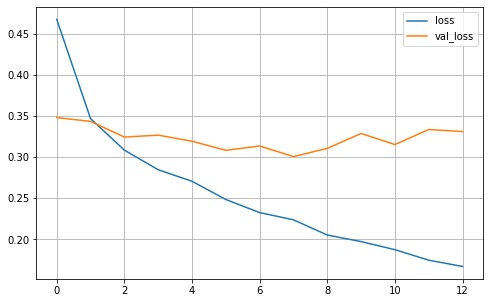

In [33]:
history = model.fit(X_train, y_train, 
                    epochs=100, batch_size = 100,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping])

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

#### Dropout

Uma forma de lidar com o enorme overfitting dos modelos anteriores é aplicando Dropout. Na prática, em vez de rodar uma rede neural, vamos aprender os pesos com base em um ensamble de redes neurais geradas aleatoriamente durante o processo de treino. O modelo aprendido tende a generalizar muito bem.

In [34]:
# dropout
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="elu", name="h1")(X)
X = keras.layers.Dropout(rate = 0.5)(X)
X = keras.layers.Dense(150, activation="elu", name="h2")(X)
X = keras.layers.Dropout(rate = 0.5)(X)
X = keras.layers.Dense(100, activation="elu", name="h3")(X)
X = keras.layers.Dropout(rate = 0.5)(X)
X = keras.layers.Dense(50, activation="elu", name="h4")(X)
X = keras.layers.Dropout(rate = 0.5)(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model_d = keras.models.Model(inputs=[model_input], outputs=[yhat])

model_d.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Epoch 1/100
550/550 [==============================] - 2s 3ms/step - loss: 1.2039 - accuracy: 0.6068 - val_loss: 0.4912 - val_accuracy: 0.8182
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 0.6743 - accuracy: 0.7679 - val_loss: 0.4237 - val_accuracy: 0.8474
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 0.5889 - accuracy: 0.8022 - val_loss: 0.4004 - val_accuracy: 0.8568
Epoch 4/100
550/550 [==============================] - 1s 2ms/step - loss: 0.5425 - accuracy: 0.8181 - val_loss: 0.3912 - val_accuracy: 0.8606
Epoch 5/100
550/550 [==============================] - 1s 3ms/step - loss: 0.5118 - accuracy: 0.8285 - val_loss: 0.3783 - val_accuracy: 0.8680
Epoch 6/100
550/550 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.8357 - val_loss: 0.3690 - val_accuracy: 0.8690
Epoch 7/100
550/550 [==============================] - 1s 3ms/step - loss: 0.4755 - accuracy: 0.8419 - val_loss: 0.3607 - val_accuracy: 0.8742

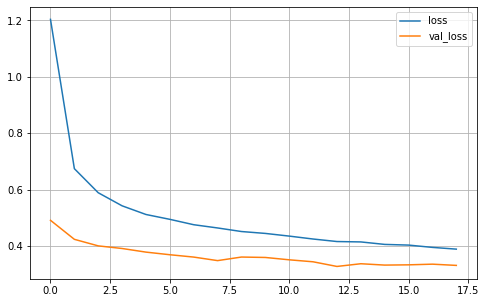

In [35]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)
history = model_d.fit(X_train, y_train, 
                    epochs=100, batch_size = 100,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping])

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

E o modelo resultante não sofre de overfitting.

#### Batch Normalization

Uma característica interessante do modelo anterior é que, embora tenhamos garantido a normalização dos dados de entrada com o Z-score, isso não se mantem ao longo das camadas:

In [36]:
import scipy.stats as stats
import pylab as pl

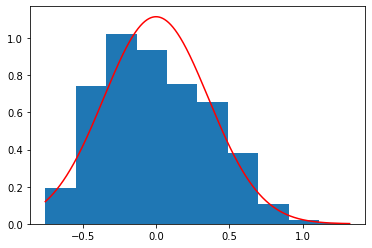

In [37]:
vals = sorted(X_train.reshape(-1,784).mean(axis = 1))
fit = stats.norm.pdf(vals, np.mean(vals), np.std(vals))
plt.hist(vals, density = True)
plt.plot(vals, fit, '-', color = 'red')

In [38]:
def plot_layer_dists(m):
    idxs = np.random.choice(range(len(X_train)), 1000, replace=False)
    sample = X_train[idxs]
    _, axs = plt.subplots(1, 4, figsize=(20, 3))
    for col in range(4):
        layer = 'h' + str(col+1)
        layer_model = keras.models.Model(inputs = m.input,
                                        outputs = m.get_layer(layer).output)
        out = layer_model.predict(sample)
        out = sorted(out.mean(axis = 1))
        fit = stats.norm.pdf(out, np.mean(out), np.std(out))
        axs[col].set_title(layer)
        axs[col].hist(out, density = True)
        axs[col].plot(out, fit, '-', color = 'red')
    plt.show()

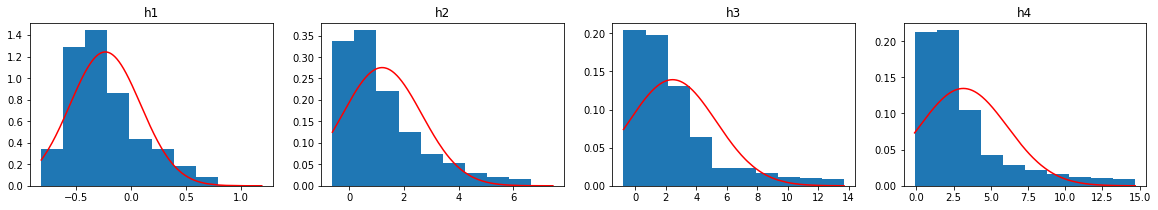

In [39]:
plot_layer_dists(model_d)

Como dá para ver, a distribuição em cada uma das camadas vai se afastando da média e se caracterizando por uma variância cada vez maior. Este fenômeno é chamado de _co-variate drift_. Uma forma de lidar com este problema é tentar aprender modelos que garantam que as saídas das camadas são sempre normalizadas, o que pode ser obtido usando, por exemplo, a técnica de Batch Normalization (BN). Em Keras, podemos usar BN como segue:

In [40]:
# BN
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)

for units, layer in [(300, 'h1'), (150, 'h2'), (100, 'h3'), (50, 'h4')]:
    X = keras.layers.Dense(units)(X)
    # BN é aplicado entre unidades e ativação
    X = keras.layers.BatchNormalization(name = layer)(X)
    X = keras.layers.Activation("elu")(X)
    X = keras.layers.Dropout(rate = 0.5)(X)

yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model_bn = keras.models.Model(inputs=[model_input], outputs=[yhat])

model_bn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Epoch 1/100
550/550 [==============================] - 3s 4ms/step - loss: 0.8869 - accuracy: 0.6939 - val_loss: 0.4572 - val_accuracy: 0.8362
Epoch 2/100
550/550 [==============================] - 2s 4ms/step - loss: 0.6143 - accuracy: 0.7921 - val_loss: 0.4197 - val_accuracy: 0.8544
Epoch 3/100
550/550 [==============================] - 2s 4ms/step - loss: 0.5584 - accuracy: 0.8113 - val_loss: 0.3988 - val_accuracy: 0.8600
Epoch 4/100
550/550 [==============================] - 2s 4ms/step - loss: 0.5258 - accuracy: 0.8227 - val_loss: 0.3757 - val_accuracy: 0.8670
Epoch 5/100
550/550 [==============================] - 2s 4ms/step - loss: 0.5077 - accuracy: 0.8296 - val_loss: 0.3888 - val_accuracy: 0.8594
Epoch 6/100
550/550 [==============================] - 2s 4ms/step - loss: 0.4930 - accuracy: 0.8337 - val_loss: 0.3958 - val_accuracy: 0.8576
Epoch 7/100
550/550 [==============================] - 2s 4ms/step - loss: 0.4772 - accuracy: 0.8387 - val_loss: 0.3647 - val_accuracy: 0.8696

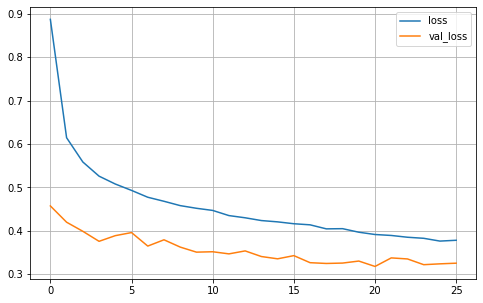

In [41]:
history_bn = model_bn.fit(X_train, y_train, 
                    epochs=100, batch_size = 100,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

pd.DataFrame(history_bn.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

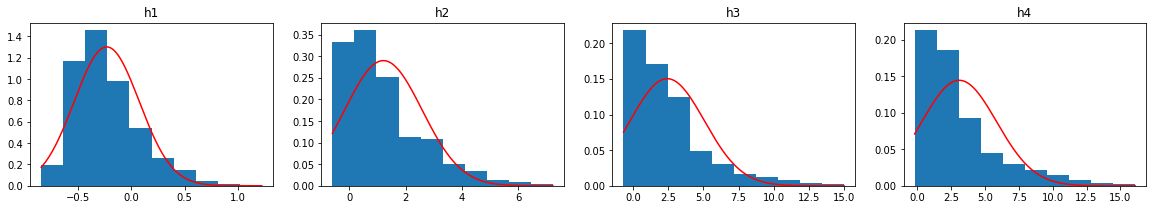

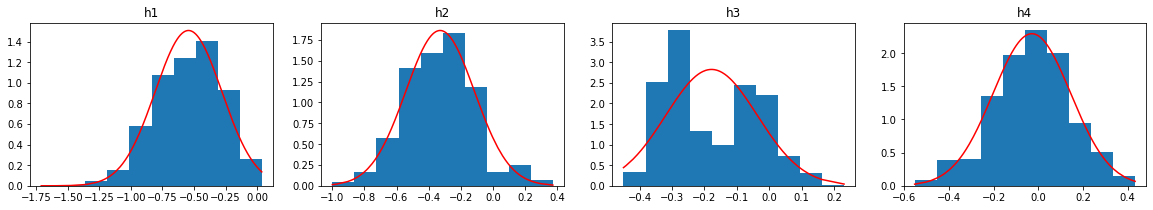

In [42]:
plot_layer_dists(model_d)
plot_layer_dists(model_bn)

Note acima que, claramente, o modelo com BN mantem muito melhor a centralização na média e a escala ao longo das camadas. O resultado disso é um aprendizado mais rápido e, para o mesmo número de épocas, uma maior redução do erro:

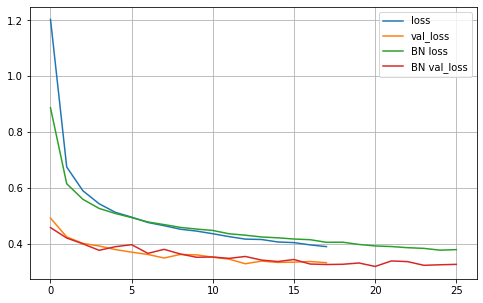

In [43]:
ax = pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
pd.DataFrame(history_bn.history)[['loss', 'val_loss']].plot(figsize=(8, 5), ax = ax)
plt.legend(['loss', 'val_loss', 'BN loss', 'BN val_loss'])
plt.grid(True)
plt.show()

#### Regularizadores

Outros regularizadores comumente usados consistem em restrições ao conjunto de pesos adotados, aplicados diretamente sobre a função a ser minizada:

$${\bf w*} = \arg \min_{\bf w} \ell(\hat{{\bf y}}_{\bf w}, {\bf y}) + \lambda \mathcal{R}({\bf w})$$

No caso acima, $\mathcal{R}$ indica o regularizador e $\lambda$, a sua importância para o processo de minimização (o coeficiente de regularização). Alguns exemplos bem comuns destes regularizadores são:

* L1 ou regularizador de Lasso: $\mathcal{R}({\bf w}) = \lVert{\bf w}\rVert_1 = \sum_j |w_j|$. O L1 tende a fazer o otimizador preferir conjuntos de pesos esparsos, ou seja, ele reduz pesos menos importantes até eles serem zero. 
* L2 ou regularizador de Ridge: $\mathcal{R}({\bf w}) = \lVert{\bf w}\rVert_2^2 = \sum_j w_j^2$. O L2 tende a punir muito pesos maiores, fazendo com que o otimizador prefira conjuntos de pesos similares.

Como isso acontece?

Imagine que você tem um vetor ${\bf w} = (1, \xi)$ com $\xi > 0$ muito pequeno. Ao aplicar L1 e L2, você obtem $L1({\bf w}) = 1 + \xi$ e $L2({\bf w}) = 1 + \xi^2$. Imagine agora que você tem a opção de usar conjuntos de pesos menores (${\bf w}'$ e ${\bf w}'$) em que um dos componentes do peso será reduzido de $\delta$, ou seja, ${\bf w}' = (1 - \delta, \xi)$ e ${\bf w}'' = (1, \xi - \delta)$. Qual o efeito da aplicação de L1 e L2 nesses casos?

\begin{align}
L1({\bf w}') &= 1 - \delta + \xi \\
L1({\bf w}'') &= 1 + \xi - \delta = L1({\bf w}') \\
L2({\bf w}') &= (1 - \delta)^2 + \xi^2 = 1 + \delta^2 + \xi^2 - 2\delta\\
L2({\bf w}'') &= 1 + (\xi - \delta)^2 = 1 + \delta^2 + \xi^2 - 2 \xi \delta > L2({\bf w}')~\text{se $\xi$ é muito pequeno!}\\
\end{align}

Observe que claramente que o L2 prefere não penalizar valores pequenos, o que resulta em vários pesos com algum valor relevante à medida que os valores maiores vão sendo penalizados. Já o L1 tende penalizar todos os pesos, menores e maiores, da mesma forma. No limite, ele faz os menores desaparecerem.

Abaixo, vemos como incorporar regularizadores L1 e L2 à nossa primeira arquitetura desta aula:

In [44]:
from keras import regularizers

reg_lambda = 0.01
L1 = regularizers.l1(reg_lambda)
L2 = regularizers.l2(reg_lambda)

In [45]:
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="relu", name="h1", kernel_regularizer=L1)(X)
X = keras.layers.Dense(100, activation="relu", name="h2", kernel_regularizer=L1)(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_l1 = model.fit(X_train, y_train, 
                    epochs=100, batch_size = 100,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
550/550 [==============================] - 2s 2ms/step - loss: 51.4661 - accuracy: 0.7481 - val_loss: 13.4181 - val_accuracy: 0.7742
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 5.4831 - accuracy: 0.7135 - val_loss: 2.3845 - val_accuracy: 0.6980
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 1.7792 - accuracy: 0.7193 - val_loss: 1.4888 - val_accuracy: 0.7482
Epoch 4/100
550/550 [==============================] - 1s 2ms/step - loss: 1.4103 - accuracy: 0.7451 - val_loss: 1.3309 - val_accuracy: 0.7700
Epoch 5/100
550/550 [==============================] - 1s 2ms/step - loss: 1.3106 - accuracy: 0.7608 - val_loss: 1.2616 - val_accuracy: 0.7746
Epoch 6/100
550/550 [==============================] - 1s 2ms/step - loss: 1.2581 - accuracy: 0.7716 - val_loss: 1.2252 - val_accuracy: 0.7792
Epoch 7/100
550/550 [==============================] - 1s 2ms/step - loss: 1.2207 - accuracy: 0.7782 - val_loss: 1.1866 - val_accuracy: 0.78

In [46]:
model_input = keras.layers.Input(shape=(28, 28), name="images")
X = keras.layers.Flatten(name="input")(model_input)
X = keras.layers.Dense(300, activation="relu", name="h1", kernel_regularizer=L2)(X)
X = keras.layers.Dense(100, activation="relu", name="h2", kernel_regularizer=L2)(X)
yhat = keras.layers.Dense(10, activation="softmax", name="output")(X)

model = keras.models.Model(inputs=[model_input], outputs=[yhat])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_l2 = model.fit(X_train, y_train, 
                    epochs=100, batch_size = 100,
                    validation_data=(X_valid, y_valid), 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
550/550 [==============================] - 2s 2ms/step - loss: 5.9376 - accuracy: 0.7709 - val_loss: 5.2173 - val_accuracy: 0.8272
Epoch 2/100
550/550 [==============================] - 1s 2ms/step - loss: 4.7224 - accuracy: 0.8340 - val_loss: 4.2494 - val_accuracy: 0.8520
Epoch 3/100
550/550 [==============================] - 1s 2ms/step - loss: 3.8710 - accuracy: 0.8459 - val_loss: 3.5078 - val_accuracy: 0.8572
Epoch 4/100
550/550 [==============================] - 1s 2ms/step - loss: 3.1983 - accuracy: 0.8532 - val_loss: 2.9020 - val_accuracy: 0.8640
Epoch 5/100
550/550 [==============================] - 1s 2ms/step - loss: 2.6628 - accuracy: 0.8580 - val_loss: 2.4321 - val_accuracy: 0.8628
Epoch 6/100
550/550 [==============================] - 1s 2ms/step - loss: 2.2341 - accuracy: 0.8612 - val_loss: 2.0475 - val_accuracy: 0.8672
Epoch 7/100
550/550 [==============================] - 1s 2ms/step - loss: 1.8908 - accuracy: 0.8631 - val_loss: 1.7392 - val_accuracy: 0.8686

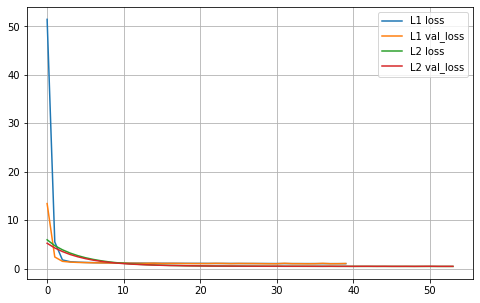

In [47]:
ax = pd.DataFrame(history_l1.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
pd.DataFrame(history_l2.history)[['loss', 'val_loss']].plot(figsize=(8, 5), ax = ax)
plt.legend(['L1 loss', 'L1 val_loss', 'L2 loss', 'L2 val_loss'])
plt.grid(True)
plt.show()

### Codificador

Se redes neurais modificam o espaço de forma que cada camada facilita a separação linear das classes, é de se esperar que as representações de duas entradas da mesma classe, em uma camada profunda de uma rede neural, sejam similares. De certo forma, é como se a codificação destas entradas ganhassem uma natureza conceitual. Para verificarmos esta ideia, vamos construir um novo modelo (chamado _codificador_), a partir do anterior, em que a camada de saída corresponde à camada h2 daquele modelo:

In [48]:
codificador = keras.models.Model(inputs = model.input, 
                                 outputs = model.get_layer('h2').output)

In [49]:
Xt_codes = codificador.predict(X_test)
Xt_codes.round(2)

array([[ 2.18,  0.  ,  0.  , ..., 28.9 ,  0.  ,  0.  ],
       [ 6.94, 38.95, 34.57, ...,  3.95,  0.  , 62.37],
       [68.05, 77.69, 12.35, ...,  1.49,  1.87, 77.01],
       ...,
       [29.09,  0.  , 22.62, ...,  0.  ,  0.  ,  0.  ],
       [49.22, 78.04,  3.29, ...,  6.53, 11.  , 65.4 ],
       [ 0.71,  0.  ,  4.57, ...,  8.91,  1.21,  3.09]], dtype=float32)

In [50]:
Xt_codes.shape

(10000, 100)

Vamos agora armazenar estes pontos de forma a podermos recuperá-los de acordo com suas distâncias (usando uma kd-tree):

In [51]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nbrs.fit(Xt_codes)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

Se tomarmos um ponto aleatório entre os 1000 de testes e procurarmos seus 10 vizinhos mais próximos, observamos o seguinte:

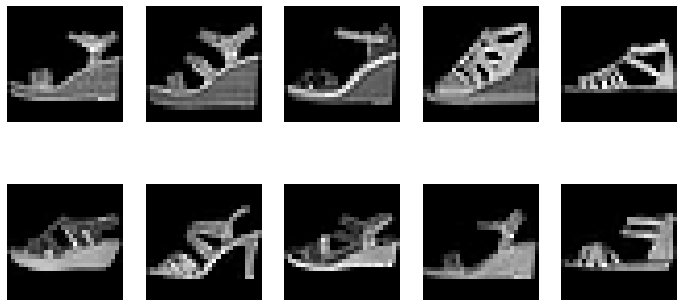

In [52]:
r = np.random.randint(0, Xt_codes.shape[0], 1)[0]
_, indices = nbrs.kneighbors(Xt_codes[r].reshape(1,-1))
plotimages([X_test[r] for r in indices[0]], n_row = 2, n_col = 5)

O que confirma a ideia de que as representações de imagens semelhantes são semelhantes, ou seja, o espaço está "organizado" de forma que objetos semelhantes ocorrem perto uns dos outros!